# Bagging Example

## Imports

In [1]:
import matplotlib.pyplot as plt

import cristal as cst

2025-08-08 11:48:26,609 	 DEBUG 	 cristal 	 CRISTAL version 0.0.1 (date: 2025-08-08) loaded successfully.


## Generate data

In [2]:
n_samples = 5_001
data = cst.evaluation.data.make_T_rotated(n_samples)

2025-08-08 11:48:26,623 	 WARNING 	 cristal.evaluation.data 	 n_samples must be even to create two normal distributions. Adjusting n_samples = 5001 to 5000.


## Bagging parameters

In [3]:
n_estimators = 10
n_values = [5, 5, 5, 6, 7, 8, 5, 4, 3, 2]
training_samples = 1000

## Create BaggingDyCF and DyCF instances

In [4]:
bagging_model = cst.BaggingDyCF(n_values, n_estimators=n_estimators, regularizer_opt=cst.IMPLEMENTED_REGULARIZERS.CONSTANT)
model = cst.DyCF(n=n_values[0], regularizer_opt=cst.IMPLEMENTED_REGULARIZERS.CONSTANT)

2025-08-08 11:48:26,716 	 DEBUG 	 cristal.detectors.datasteams 	 BaggingDyCF initialized with 10 models of mean degrees: 5


## Fit the models

In [5]:
bagging_model.fit(data, n_samples=training_samples)

In [6]:
model.fit(data)

## Plot the results

In [7]:
levels = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 50, 100, 5000, 10000, 20000, 30000]
bagging_plotter = cst.DyCFPlotter(bagging_model)
model_plotter = cst.DyCFPlotter(model)

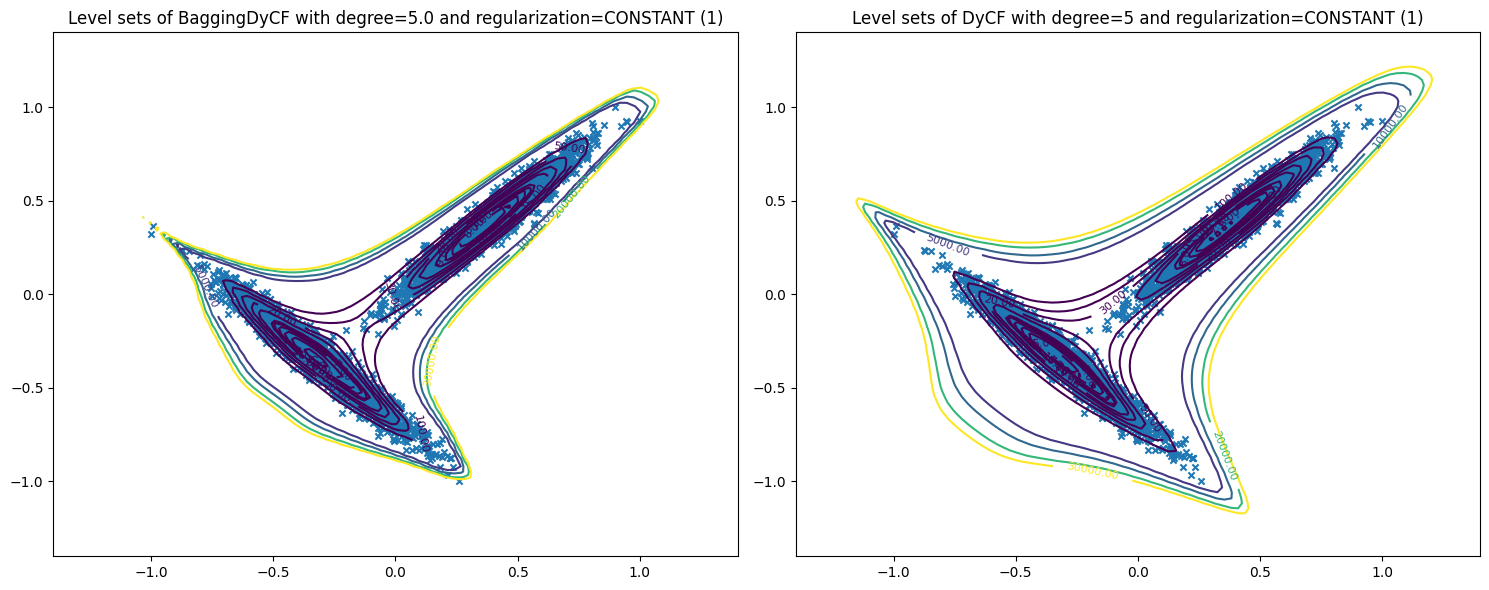

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

bagging_plotter.levelset(data, levels=levels, fig=fig, ax=axs[0], close=False, show=False)
model_plotter.levelset(data, levels=levels, fig=fig, ax=axs[1], close=False, show=False)
plt.tight_layout()
plt.show()